In [1]:
import pandas as pd
import numpy as np
import sys

sys.path.append("..")

from votenrank import Leaderboard
from votenrank.stability_exp import spearman_exp, create_exp_pic
from votenrank.data_processing import preprocess_glue, preprocess_sglue, preprocess_value

pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
NUM_REPEATS = 100
EXP_RANGE = np.arange(0, 0.21, 0.01)
TOP_K = 7

  0%|          | 0/2100 [00:00<?, ?it/s]

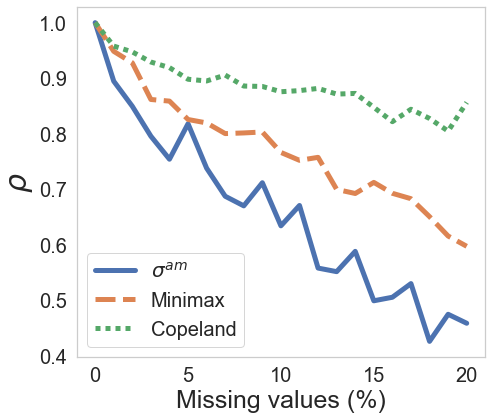

In [3]:
glue, glue_weights = preprocess_glue(pd.read_csv("../tables/leaderboards - GLUE.csv"))
glue_lb = Leaderboard(glue.drop(columns=["AX"]).dropna(), weights=glue_weights)

glue_res = spearman_exp(glue_lb, NUM_REPEATS, EXP_RANGE, TOP_K)
glue_pic = create_exp_pic(EXP_RANGE, glue_res)

  0%|          | 0/2100 [00:00<?, ?it/s]

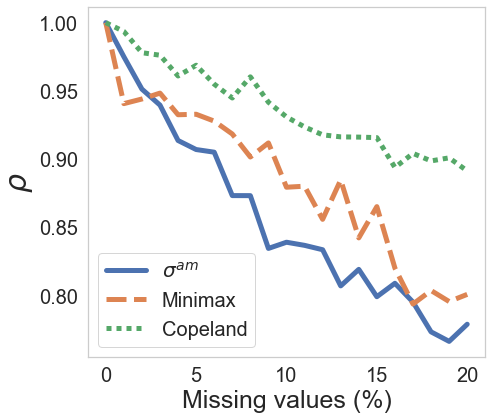

In [4]:
sglue, sglue_weights = preprocess_sglue(pd.read_csv("../tables/leaderboards - SuperGLUE.csv"))
sglue_lb = Leaderboard(sglue.dropna(), weights=sglue_weights)

sglue_res = spearman_exp(sglue_lb, NUM_REPEATS, EXP_RANGE, TOP_K)
sglue_pic = create_exp_pic(EXP_RANGE, sglue_res)

  0%|          | 0/2100 [00:00<?, ?it/s]

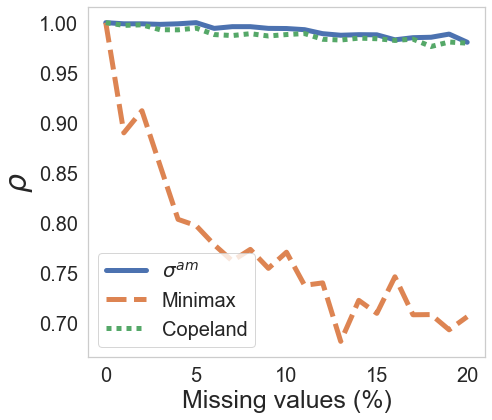

In [5]:
value = preprocess_value(pd.read_csv("../tables/leaderboards - VALUE.csv"))
value_lb = Leaderboard(value.dropna())

value_res = spearman_exp(value_lb, NUM_REPEATS, EXP_RANGE, TOP_K)
value_pic = create_exp_pic(EXP_RANGE, value_res)